In [1]:
%pylab inline
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download("popular", quiet=True)

Populating the interactive namespace from numpy and matplotlib


True

# Affection status visualizer (text analytics)

> Contributors: Eric Keränen, Samuel Aitamaa & Teemu Luhtanen

In this assignment the task is to write a Python sentiment analysis tool that visualizes the changes in the affective state of a single text (e.g. a novel).

## Part I - Data

We took our data from [Project Gutenberg](https://www.gutenberg.org/files/52521/52521-h/52521-h.htm) and chose to analyze Grimm's Fairy Tales. These are classic fairy tales such as Little Red-Cap and The Wolf And The Seven Little Kids. We chose these classical short stories for two reasons: they are short enough to have a high affective state and they are familiar for everyone, making the analyzation and examination of results ensuring rather than investigative. We manually copied each story to a <code>.txt</code> file and stripped them from unwanted content, such as the line number.

We analyze only one of the stories in this project, which is <i>Little Red-Cap</i> aka <i>Little Red Riding Hood</i>.

In [2]:
# Uncomment the title and text that will be selected

#title = "Grimms Fairy Tales: Little Brother and Little Sister"
#text = open("grimms_fairy_tales/little_brother_and_little_sister.txt", "r", encoding="utf8").read()

title = "Grimms Fairy Tales: Little Red-Cap"
text = open("grimms_fairy_tales/little_red-cap.txt", "r", encoding="utf8").read()

#title = "Grimms Fairy Tales: Rapunzel"
#text = open("grimms_fairy_tales/rapunzel.txt", "r", encoding="utf8").read()

#title = "Grimms Fairy Tales: The Wolf and the Seven Little Kids"
#text = open("grimms_fairy_tales/the_wolf_and_the_seven_little_kids.txt", "r", encoding="utf8").read()

## Part II - Preprocessing

We started preprocessing with removing stopwords from the text. Stopwords are the words which doesn't
add much meaning to a sentence, so they can be ignored without sacrificing the meaning of the sentence.
For example words like "the", "he" and "have" are stopwords.

In [3]:
# Remove stop words from ctokens
def remove_stopwords(tokens, ctokens):
    sw = stopwords.words('english')
    for token in tokens:
        if token in sw:
            ctokens.remove(token)
            
    return [tokens, ctokens]

Next, we lemmatized the text. Lemmatization means that we convert a word to its base form. For example,
rocks --> rock or feet --> foot. The difference between stemming and lemmatization is that lemmatization
considers the context and converts the word to its meaningful base form. Stemming just removes the
last few characters, often leading to incorrect meanings and spelling errors.

> "Lemmatisation in linguistics is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form."  
> [Wikipedia, Lemmatization](https://en.wikipedia.org/wiki/Lemmatisation)

In [4]:
# Lemmatize ctokens
def lemmatize(ctokens):
    lemmatizer = WordNetLemmatizer()
    for i in range(len(ctokens)):
        ctokens[i] = lemmatizer.lemmatize(ctokens[i])
        
    return ctokens

After that we counted the score of each sentence in the text. This means that we went through every word of a
sentence and found out positive and negative words. Every positive word gave +1 point to the score
and every negative word gave -1 point to the score. The score is calculated as the positive count minus the negative count.

Positive and negative works are from GitHub user [mkulakowski2](https://github.com/mkulakowski2).  
Positive words are from [this page](https://gist.github.com/mkulakowski2/4289437) and negative words are from [this page](https://gist.github.com/mkulakowski2/4289441).

In [5]:
# Count the score of each sentence
def count_pos_neg(tokens, ctokens, print_words):
    pos_words = open("positive_words.txt", "r").read().split()
    neg_words = open("negative_words.txt", "r").read().split()
    
    countpositive = countnegative = 0
    
    for token in ctokens:
        cat = ""
        if token in pos_words:
            cat = cat + "POS"
            countpositive = countpositive + 1
        elif token in neg_words:
            cat = cat + "NEG"
            countnegative = countnegative + 1
        if print_words: print("Word:", token, cat)
        
    return countpositive - countnegative

Lastly, we removed extra characters from the text. This means that for example characters like ',' , ':' and
' " ' were removed. If the character was "?" or "!", it was replaced with ".". Then we split the text to
sentences using "."-characters as a sentence cutting points.

In [6]:
# Remove extra characters
for c in ['?', '!', ',',':',';', '\n', '”', '”', '"', '“', '‘', '’']:
    if (c == '?' or c == '!'): text = text.replace(c,'.')
    else: text = text.replace(c,' ')
    
text = text.split(".")

### Part III - Analyzing

For the analyze section we define a function to calculate the score of each sentence. Below we have an algorithm that does the following:
1. Split the sentence into tokens
2. Lower-case all the tokens
3. Remove all of the stopwords
4. Lemmatize the words (tokens)
5. Count the score for each sentence

In [7]:
def sentiment(text):
    # Split text into tokens
    tokens = text.split()
    
    # Lower case all tokens
    tokens = [token.lower() for token in tokens if token.isalpha()]
    
    # Make a 'help' variable
    ctokens = tokens
    
    # Remove english stopwords
    tokens, ctokens = remove_stopwords(tokens, ctokens)
    
    # Lemmatize words
    ctokens = lemmatize(ctokens)
    
    # Count the score of the sentences
    score = count_pos_neg(tokens, ctokens, print_words=False) 
    
    # Return the score
    return score

Here we conduct the sentiment analysis itself. We use the array of sentences to get each sentence individually and do the sentiment analysis to the sentence. Then we print the sentence and the score it has been given and also save it to a list of <code>scores</code>.

In [8]:
scores = []

for sentence in text:
    score = sentiment(sentence)
    print (f"Sentence: '{sentence.strip()}'")
    print ("score: ", score)
    print ("\n")
    scores.append(score)

Sentence: 'Once upon a time  there was a sweet little girl  who was loved by every one who looked at her  and most of all by her Grandmother'
score:  2


Sentence: 'There was nothing that she would not have given the child'
score:  0


Sentence: 'Once she gave her a little cap of red velvet  which suited her so well that she would not wear anything else'
score:  1


Sentence: 'So she was always called Little Red-Cap'
score:  0


Sentence: 'One day  her Mother said to her   Come  Little Red-Cap  here is a piece of cake and a bottle of wine'
score:  0


Sentence: 'Take them to your Grandmother'
score:  0


Sentence: 'She is ill and weak  and they will do her good'
score:  0


Sentence: 'Set out before it gets hot'
score:  1


Sentence: 'Walk nicely and quietly'
score:  1


Sentence: 'Do not run off the path  or you may fall and break the bottle  then your Grandmother will get nothing'
score:  -2


Sentence: 'When you go into her room  don t forget to say  Good morning   and don t stop to

In the text there are some words we would consider negative or positive, but they weren't neither (meaning they were neutral).

For example in the sentence `'She is ill and weak and they will do her good'` we have the word `'ill'` that we would consider to be negative, but accroding the the negative words, it isn't one. Another example would be in the sentence `'Do I find thee here thou old sinner'` where we would say that `'sinner'` is also negative. As for positive words we would consider the word `'dear'` in the sentence `'And when she went into the room she had such a strange feeling that she said to herself Oh dear'` as positive, even though from the context we can see that it isn't strictly positive. The meaning of the word `'dear'` itself is positive.

Another thing is that the analysis may mistake some words as negative, since some words can mean different things when we take context into account. In the sentence `'So he went into the room  and when he came to the bed  he saw the Wolf lying in it'` the word `'lying'` is seen as not telling the truth, even though in the context of the sentence it means just lying down in a bed for example.

### Part IV - Graphs

In this section we are going to display the results. We are visualizing the affectiveness score and the delta3 values of the analyzation as a function of sentences.

Below we can thee the score graph.

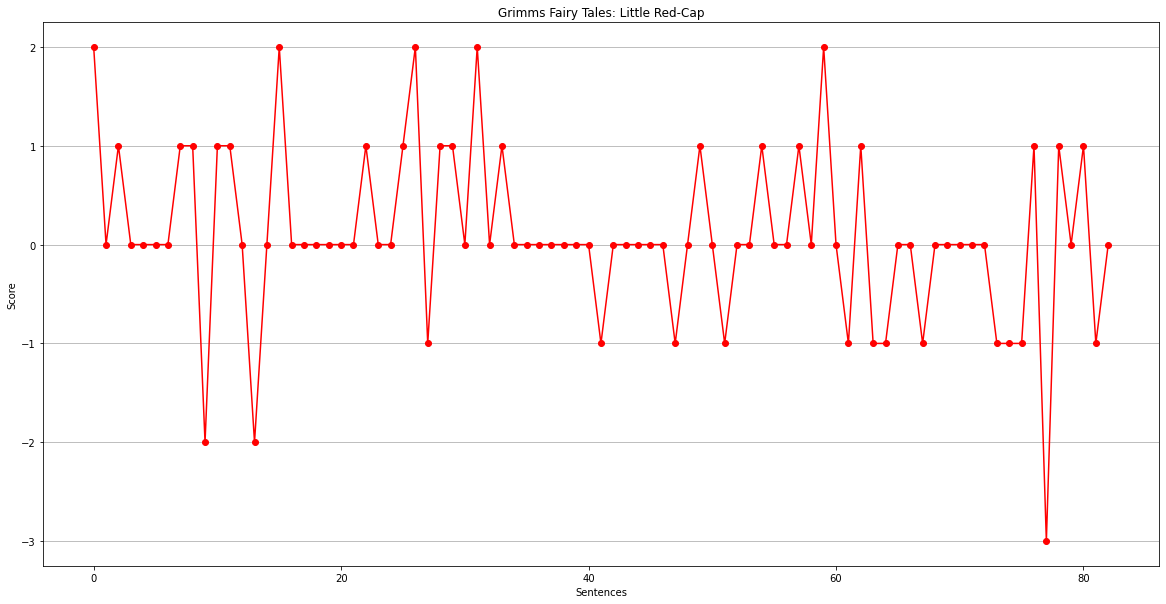

In [9]:
plt.figure(figsize = (20,10))
plt.title(title)
plt.plot(scores, "-or")
plt.ylabel("Score")
plt.xlabel("Sentences")
plt.grid(axis="y")
plt.show()

We can see that the story <i>Little Red-Cap</i> starts of with a positive score and stays relatively positive with some dips into negative scores up until sentence 38. It stays near zero with some minor positive spikes for the duration of the "middle act", from sentence 35 up until around sentence 50. At that point it goes back up again, until going heavily down around sentence 60. Some kind of climax is observable in the final moments of the story.

**!!! SPOILER ALERT !!!**

The initial surge of positive words can be explained by how the Wolf is describing how tasteful the young Little Red-Cap and her grandmother would taste according to their appearance. The Wolf is using very descriptive and flattering words about them.

At the end of the story we can prove why there is a dip to negative words. We know that the story of <i>Little Red-Cap</i> does have a happy ending, but it's an especially gruesome one, with cutting open the Wolfs stomach and filling it up with stones. In the absolute end we see a small rise in positive words, since a huntsman managed to save Little Red-Cap and her grandmother while they celebrate their victory.

**!!! END OF SPOILER !!!**

Next we are going to compute the delta3 values of the scores for visualization:

In [10]:
# https://stackoverflow.com/questions/13728392/moving-average-or-running-mean
deltas = np.convolve(scores, np.ones(7)/7, mode='same')

for i in range(14):
    extra = ""
    if i >= 3 and i < 11: extra = "->"
    print (f"{extra} {i + 1}. Score: {scores[50 + i]} - Delta3: {round(deltas[50 + i], 3)}")

 1. Score: 0 - Delta3: -0.143
 2. Score: -1 - Delta3: 0.143
 3. Score: 0 - Delta3: 0.143
-> 4. Score: 0 - Delta3: 0.0
-> 5. Score: 1 - Delta3: 0.143
-> 6. Score: 0 - Delta3: 0.286
-> 7. Score: 0 - Delta3: 0.571
-> 8. Score: 1 - Delta3: 0.571
-> 9. Score: 0 - Delta3: 0.286
-> 10. Score: 2 - Delta3: 0.429
-> 11. Score: 0 - Delta3: 0.286
 12. Score: -1 - Delta3: 0.0
 13. Score: 1 - Delta3: 0.0
 14. Score: -1 - Delta3: -0.286


The delta3 algorithm has been borrowed from [this thread](https://stackoverflow.com/questions/13728392/moving-average-or-running-mean) and the calculation is done to every score in the array.

As an example from the fourteen scores and deltas displayed, we can only prove (with the information that has been printed) the ones that are preceded with an arrow. For example the tenth delta in the list is calculated like so:

Tenth delta3 from the list:  
(0 + 1 + 0 + 2 + 0 - 1 + 1) / 7 ≈ 0.429

Below we can see the delta3 graph, which is more understandable than the score graph.

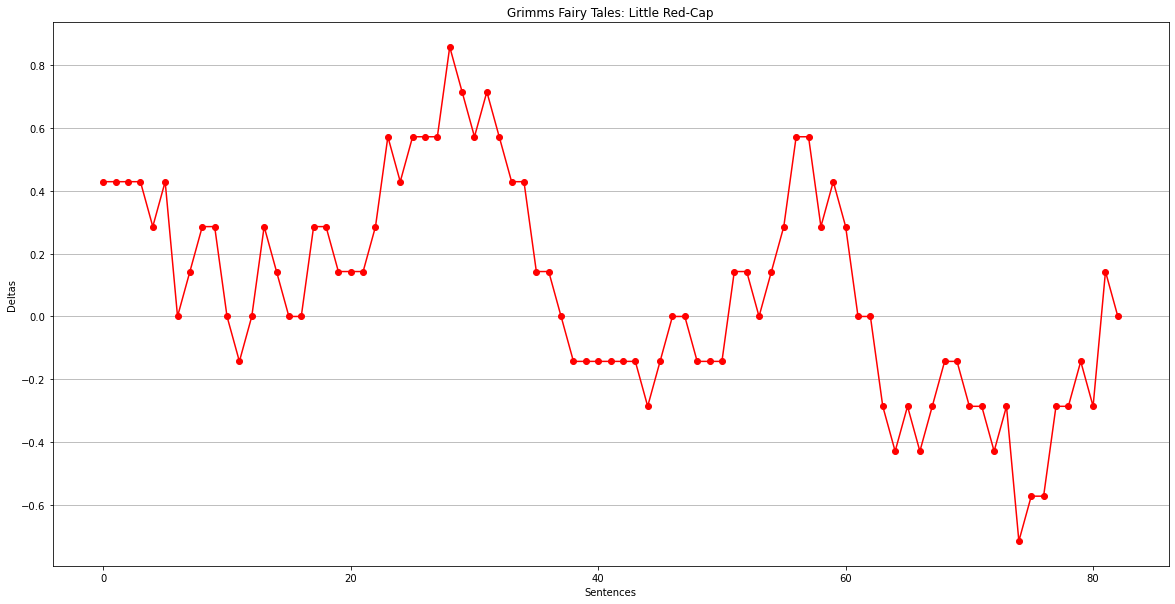

In [11]:
plt.figure(figsize = (20,10))
plt.title(title)
plt.plot(deltas, "-or")
plt.ylabel("Deltas")
plt.xlabel("Sentences")
plt.grid(axis="y")
plt.show()

This graph shows the delta3 values of the scores. With this exhibit we can perhaps distinguish a [Freytag's pyramid](https://en.wikipedia.org/wiki/Dramatic_structure#Freytag's_pyramid), also known as the <b>dramatic arc</b>. Some kind of positive stage is occuring up until the final climax, and finishing again with a happy ending.

As mentioned before, the story starts with positive words until sentence 38. After sentence 38 there is a decline into negative words and from the fiftieth sentence onward we can observe the climax of the story.